# Machine Learning Model

### Creation of an instance

In [18]:
import records

In [83]:
ep = records.Epochs("Chromis", 1975, 2000, 3)

In [86]:
EP = ep.sdf.dropna()
EP.shape

(502, 5)

In [113]:
y = EP['species']

In [112]:
x = EP['stateProvince']

### One Hot Encoding of State Names

In [91]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [111]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(x)
onehot_encoder = OneHotEncoder(sparse = False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

### PCA Model Test

In [98]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(onehot_encoded, y, random_state=1)

In [99]:
from sklearn.decomposition import PCA
model = PCA(n_components = 2)
model.fit(onehot_encoded)
X_2D = model.transform(onehot_encoded)

In [107]:
import seaborn as sns

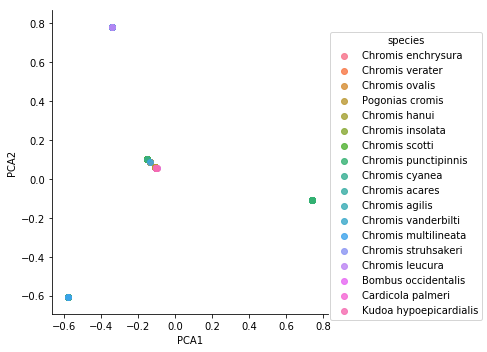

In [108]:
EP['PCA1'] = X_2D[:,0]
EP['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1", "PCA2", hue = 'species', data = EP, fit_reg = False)

### KNeighbors Classifer Test

In [118]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(onehot_encoded,y)
y_model= model.predict(onehot_encoded)
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

0.5697211155378487

In [119]:
from sklearn.cross_validation import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(onehot_encoded, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.6733067729083665

#### I attempted two different models during this assignment. The KNeighbors Classifier Test fits the assignment guidelines more closely. This test was trying to predict the species of fish (chromis) based off of the state in which it the sample was collected. This model was able to predict a good number of the samples, the accuracy score was 67%. However, it likely had a hard time predicting the species if the species had a larger range and thus appeared in multiple states. I think it could be improved by more features, since some of these species co-occur within the same regions. 